In [2]:
import yfinance as yf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#Pull IYT (Transportation ETF) data
ticker = "IYT" 
start= "2018-01-01" 
end= "2021-12-17"

transport = yf.download(ticker, start=start, end=end,progress=False)
transport = transport.asfreq(freq='D').ffill().dropna()
transport.to_csv('resources/transport.csv')
transport.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,192.770004,195.089996,192.630005,195.059998,186.266968,297800.0
2018-01-03,194.850006,195.880005,193.929993,195.270004,186.467484,525900.0
2018-01-04,196.190002,197.000000,195.020004,195.949997,187.116806,259300.0
2018-01-05,196.880005,198.199997,195.679993,196.889999,188.014450,439900.0
2018-01-06,196.880005,198.199997,195.679993,196.889999,188.014450,439900.0


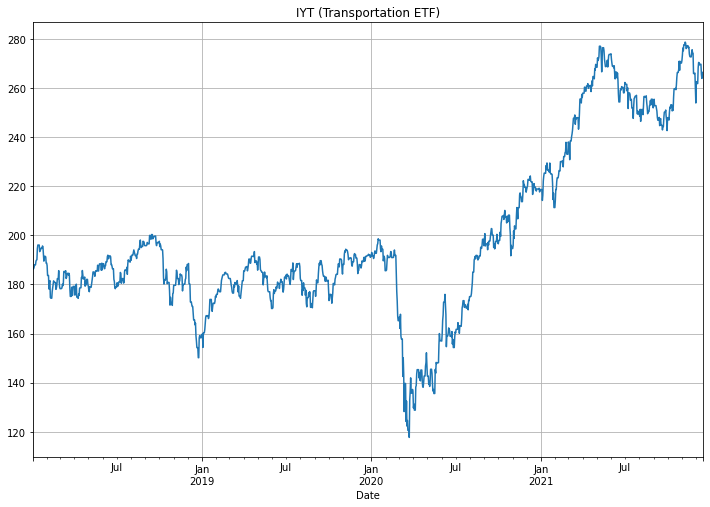

In [4]:
#Plot IYT historical prices
transport_plot = transport['Adj Close'].plot(figsize=(12,8), title='IYT (Transportation ETF)', grid=True)

In [5]:
# Pull S&P Index historical values from yfinance API
ticker = "^GSPC" 
start= "2018-01-01" 
end= "2021-12-17"

sp_history = yf.download(ticker, start=start, end=end, progress=False)
sp_history = sp_history.asfreq(freq='D').ffill().dropna()
sp_history.to_csv('resources/sp_history.csv')
sp_history.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,2683.729980,2695.889893,2682.360107,2695.810059,2695.810059,3.367250e+09
2018-01-03,2697.850098,2714.370117,2697.770020,2713.060059,2713.060059,3.538660e+09
2018-01-04,2719.310059,2729.290039,2719.070068,2723.989990,2723.989990,3.695260e+09
2018-01-05,2731.330078,2743.449951,2727.919922,2743.149902,2743.149902,3.236620e+09
2018-01-06,2731.330078,2743.449951,2727.919922,2743.149902,2743.149902,3.236620e+09


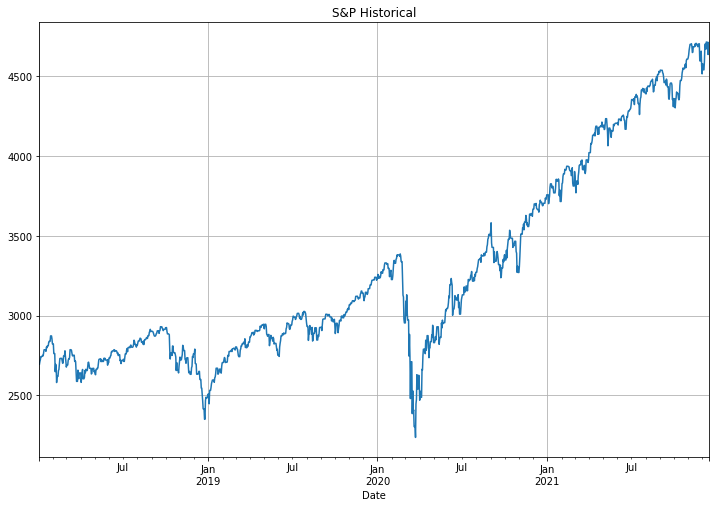

In [6]:
#Plot S&P Index historical data
sp_plot = sp_history['Adj Close'].plot(figsize=(12,8), title='S&P Historical', grid=True)

In [7]:
#Calculate IYT percent change and 200-day rolling average
transport_percent_change = transport['Adj Close'].pct_change()
transport_percent_change_rolling = transport_percent_change.rolling(window=200).mean()

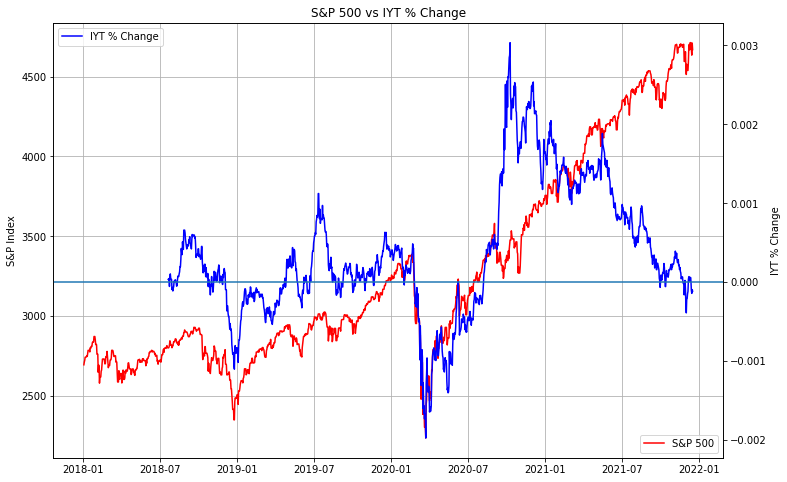

In [8]:
#Plot IYT percent change 200-day rolling average vs S&P 500 index to identify % change below and above y value of 0 
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(sp_history['Adj Close'], label ='S&P 500', color='r')
ax.set_ylabel('S&P Index')
plt.grid()
ax.legend(loc='lower right')

ax2 = ax.twinx()
plt.plot(transport_percent_change_rolling, label='IYT % Change', color='b')
ax.set_title('S&P 500 vs IYT % Change')
ax2.set_ylabel('IYT % Change')
ax2.axhline(y=0)
ax2.legend(loc='upper left')